In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows',40)

# Importando Dados

In [2]:
df = pd.read_csv('C:/Users/felip/Desktop/Projetos/DataScientists Salary/Salary Dataset.csv')

In [3]:
df.head(5)

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [4]:
df.columns.tolist()

['Company Name', 'Job Title', 'Salaries Reported', 'Location', 'Salary']

In [5]:
colunas = ['Nome Da Empresa','Cargo','Frequencia Salarial','Localização','Salario']
df.columns = colunas

# Iniciando Preprocessamento

In [6]:
df_preprocessing = df.copy()

In [7]:
df_preprocessing.head()

,Nome Da Empresa,Cargo,Frequencia Salarial,Localização,Salario
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


## Verificando os tipos de moedas informadas para tratamento dos dados

In [8]:
# Verificando se existem moedas além das rupias indianas
df_preprocessing[~df_preprocessing['Salario'].str.contains("₹")].head(1)

,Nome Da Empresa,Cargo,Frequencia Salarial,Localização,Salario
415,ICICI Bank,Data Scientist,1.0,Bangalore,"$2,24,948/yr"


In [9]:
df_preprocessing[~df_preprocessing['Salario'].str.contains("AFN|₹|£")].head()

,Nome Da Empresa,Cargo,Frequencia Salarial,Localização,Salario
415,ICICI Bank,Data Scientist,1.0,Bangalore,"$2,24,948/yr"
658,Infosys,Data Scientist,1.0,Bangalore,"$5,11,613/yr"
1096,Schlumberger,Data Scientist,1.0,Pune,"$53,527/yr"
1846,IBM,Data Scientist,1.0,Mumbai,"$2,05,476/yr"
1857,ABC,Data Scientist,1.0,Mumbai,"$96,739/yr"


In [10]:
# Faremos o mesmo para a carga horaria de trabalho, pois temos dados de dias mês e ano
df_preprocessing[~df_preprocessing['Salario'].str.contains("/yr|/mo")].head(5)

,Nome Da Empresa,Cargo,Frequencia Salarial,Localização,Salario
190,Simplilearn Solutions,Data Scientist,2.0,Bangalore,"₹1,587/hr"
196,SymphonyAI,Data Scientist,2.0,Bangalore,₹964/hr
263,GE,Data Scientist,2.0,Bangalore,₹835/hr
269,Ong & Shan,Data Scientist,2.0,Bangalore,₹183/hr
478,Toptal,Data Scientist,1.0,Bangalore,"₹1,500/hr"


In [11]:
# Chegamos a conclusão que existem 4 tipos de moedas informadas no nosso dataset
moedas = [('₹',0.013),('£',1.35),('\$',1),('AFN',0.011)]

In [12]:
tempos = ['/yr','/hr','/mo']

In [13]:
# Removendo a virgula
df_preprocessing['Salario'] = df_preprocessing['Salario'].str.replace(',','')

In [14]:
def convert(df,col='Salario',conversion_coin=1,conversion_time=1,coin='',time='',operation = 'div'):
    """Essa função converte as unidades de medida tempo e valor de uma determinada coluna
    conversion_coin = Taxa de conversão de uma moeda para a outra
    conversion_time = Taxa de conversão de um tempo para outro
    coin = Simbolo da moeda a ser convertida
    time = Tempo da moeda a ser convertida"""
    re_expression = "(?=.*{})(?=.*{})".format(coin,time)            # Expressão regular que seleciona a moeda e o tempo escolhido
    
    index = df[df[col].str.contains(re_expression)].index.tolist()  # Salvamos os indices dos dados escolhidos
    
    df.loc[index,col] = df.loc[index,col].str.replace(coin,'')     # Removemos o simbolo da moeda
     
    df.loc[index,col] = df.loc[index,col].str.replace(time,'')     # Removemos o simbolo do tempo
    
    if operation == 'div':
        df.loc[index,col] = ((df.loc[index,col].astype('float')/conversion_time)*conversion_coin).astype('str')       # Efetuamos a conversão de tempo e moeda
    else:
        df.loc[index,col] = ((df.loc[index,col].astype('float')*conversion_time)*conversion_coin).astype('str')
    
    return df


In [15]:
df_change_salary = df_preprocessing.copy()

In [16]:
df_change_salary.head()

,Nome Da Empresa,Cargo,Frequencia Salarial,Localização,Salario
0,Mu Sigma,Data Scientist,105.0,Bangalore,₹648573/yr
1,IBM,Data Scientist,95.0,Bangalore,₹1191950/yr
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,₹836874/yr
3,Impact Analytics,Data Scientist,40.0,Bangalore,₹669578/yr
4,Accenture,Data Scientist,32.0,Bangalore,₹944110/yr


In [17]:
# CONVERT YR
for moeda in moedas:
    df_converted = convert(df_change_salary,col='Salario',conversion_coin=moeda[1],conversion_time=12,coin=moeda[0],time='/yr',operation='div')
# CONVERT HR
for moeda in moedas:
    df_converted = convert(df_change_salary,col='Salario',conversion_coin=moeda[1],conversion_time=24*8,coin=moeda[0],time='/hr',operation='mult')
# CONVERT MO
for moeda in moedas:
    df_converted = convert(df_change_salary,col='Salario',conversion_coin=moeda[1],conversion_time=1,coin=moeda[0],time='/mo',operation='mult')

C:\Users\felip\AppData\Local\Temp/ipykernel_10200/228985658.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df.loc[index,col] = df.loc[index,col].str.replace(coin,'')     # Removemos o simbolo da moeda


In [18]:
df_converted.head()

,Nome Da Empresa,Cargo,Frequencia Salarial,Localização,Salario
0,Mu Sigma,Data Scientist,105.0,Bangalore,702.6207499999999
1,IBM,Data Scientist,95.0,Bangalore,1291.2791666666667
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,906.6134999999999
3,Impact Analytics,Data Scientist,40.0,Bangalore,725.3761666666666
4,Accenture,Data Scientist,32.0,Bangalore,1022.7858333333332


In [19]:
df_converted['Salario'] = round(df_converted['Salario'].astype('float'),2)

In [20]:
df_frequencys = df_converted[df_converted['Frequencia Salarial']!=1.0]

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt 

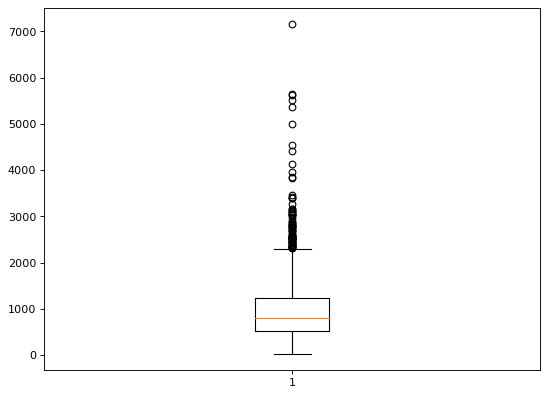

In [22]:
plt.figure(figsize=(8, 6), dpi=80)

plt.boxplot(df_frequencys['Salario']);

In [23]:
df_frequencys[['Nome Da Empresa']].value_counts()

Nome Da Empresa          
Tata Consultancy Services    26
Amazon                       25
Accenture                    21
First Student                20
IBM                          18
                             ..
HyperVerge                    1
Hypersonix (CA)               1
ICE Data Services             1
IDFC First Bank               1
wayForward                    1
Length: 1030, dtype: int64

In [24]:
df_frequencys['Localização'].value_counts()[:]

Bangalore    672
New Delhi    403
Pune         256
Mumbai       255
Hyderabad    254
Name: Localização, dtype: int64

In [ ]:
df_frequencys.

In [ ]:
# Etapa 1: Analisar tipos de dados e criar colunas necessárias
# Etapa 2: Converter todos salarios para mesma unidade de medida
# Etapa 3: Criar uma colunas Float para os salarios
# Etapa 4: Converter todos salarios para real em uma nova coluna
# Etapa 5: Eliminar os outliers
# Etapa 6: Eliminar os dados que não serão uteis

In [ ]:
# Quantas empresas temos 
# Qual empresa paga mais e qual paga menos
# Qual a confiança dessas informações 
# Quais cargos essas empresas pagam mais e quais cargos pagam menos
# 
# 
#
# Comparar se o salario é bom perante o custo de vida